In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# works.csv is 23 MB, I used firefox to download using a custom python function
artists = pd.read_csv('artists.csv')
works = pd.read_csv('works.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Narrative Analytics Guided Example

Here we're going to dive into a dataset and perform some analytics, working with a dataset from the [Tate](http://www.tate.org.uk/) in the UK. Also note that data and guided example makes a decent example for your capstone report.


# Tate Collection Data Exploration

## Data

We will be working with the Tate's dataset of artists and artworks. This data was released by the Tate, a collection of art museums in the UK, representing 70,000 works either owned by the Tate or jointly with The National Galleries of Scotland as part of their Artist Rooms Series.

For our purposes we are going to assume that it is representative of their larger collection and that it is also therefore representative of the Tate's art collecting in general post 1800 (the earliest acquisition in this dataset was acquired in 1823).

The dataset itself consists of 2 tables, artists and artworks. There are also individual json files for each artist and artwork, but we are not going to pull all of those individual files together.

The artists file contains an id, name, gender, year of birth, year of death, place of birth, place of death, and a url for the Tate's page on the artist. The works file contains accession number, id, artist, artist's role, artist id, title, date, medium, credit line, year, acquisition year, dimensions, inscription, and links to the image and the artwork's Tate webpage.

There are several challenges to this dataset. First, different kinds of artwork will demand different things from their fields. The `role` field also potentially holds a lot of interesting relationships to art practice.

## Analytic Questions

__ #1 Who are the most popular artists in the Tate Collection? Are there any outliers in terms of amount collected?__

Let's start with a simple question about popularity. Which artists and time periods has the Tate prioritized collecting? First we'll approach artists.

In [56]:
artists

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
0,10093,"Abakanowicz, Magdalena",Female,born 1930,1930.0,NaN,Polska,NaN,http://www.tate.org.uk/art/artists/magdalena-a...
1,0,"Abbey, Edwin Austin",Male,1852–1911,1852.0,1911.0,"Philadelphia, United States","London, United Kingdom",http://www.tate.org.uk/art/artists/edwin-austi...
2,2756,"Abbott, Berenice",Female,1898–1991,1898.0,1991.0,"Springfield, United States","Monson, United States",http://www.tate.org.uk/art/artists/berenice-ab...
3,1,"Abbott, Lemuel Francis",Male,1760–1803,1760.0,1803.0,"Leicestershire, United Kingdom","London, United Kingdom",http://www.tate.org.uk/art/artists/lemuel-fran...
4,622,"Abrahams, Ivor",Male,born 1935,1935.0,NaN,"Wigan, United Kingdom",NaN,http://www.tate.org.uk/art/artists/ivor-abraha...
5,2606,Absalon,Male,1964–1993,1964.0,1993.0,"Tel Aviv-Yafo, Yisra'el","Paris, France",http://www.tate.org.uk/art/artists/absalon-2606
6,9550,"Abts, Tomma",Female,born 1967,1967.0,NaN,"Kiel, Deutschland",NaN,http://www.tate.org.uk/art/artists/tomma-abts-...
7,623,"Acconci, Vito",Male,born 1940,1940.0,NaN,"New York, United States",NaN,http://www.tate.org.uk/art/artists/vito-acconc...
8,624,"Ackling, Roger",Male,1947–2014,1947.0,2014.0,"Isleworth, United Kingdom",NaN,http://www.tate.org.uk/art/artists/roger-ackli...
9,625,"Ackroyd, Norman",Male,born 1938,1938.0,NaN,"Leeds, United Kingdom",NaN,http://www.tate.org.uk/art/artists/norman-ackr...


Text(0,0.5,'Artworks Count')

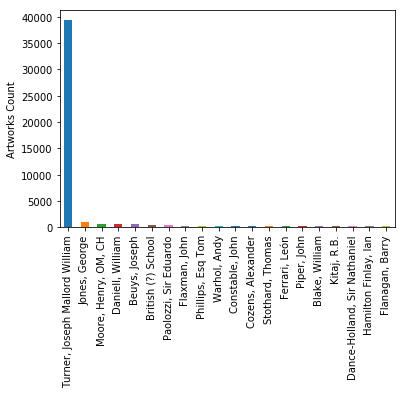

In [57]:
#T Notes: works['artist'] is the same as works.artist
#valuecounts sorts the result in a descending order by the count
works.artist.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artworks Count')

This plot of artworks by artists for the top 20 artists really only shows us one thing (other than providing a list of the 20 most popular artists): The Tate has a lot of works by William Turner.

If anyone knows about this history of British museums this is not a surprise. Turner, an immensely popular artist in his day, left all of his works in his possession to Britain and therefore the Tate as part of what is called The Turner Bequest. It makes up a large portion of the Tate Britain's museum in London.

To look at the relative popularity of other artists let's remove Turner.

<class 'pandas.core.series.Series'>


Text(0,0.5,'Artworks Count')

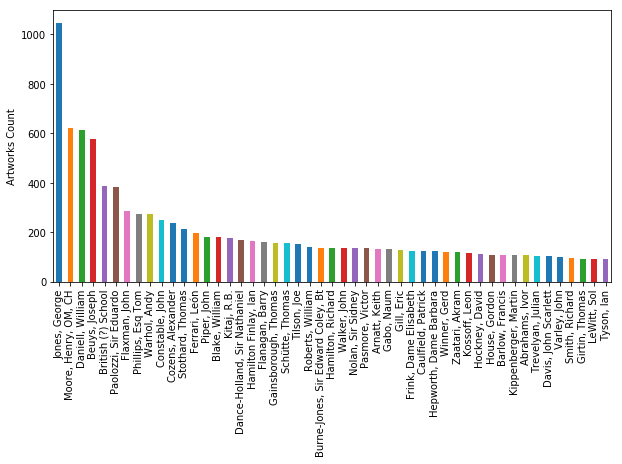

In [58]:
print(type(works.artist.value_counts()))
works.artist.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')

So there seem to be a few other exceptionally popular artists, with the first four or arguably six being collected in meaningfully larger numbers. Note Andy Warhol's presence here as one of the more currently well known artists on this list.

_Remember, this is popularity in terms of pieces collected. We have no data about visits or webviews._

__ #2 Who are the artists in the Tate collection? How does that vary by geography, age, and living or dead?__ 

In [59]:
len(artists)

3532

So there are 3,532 artists in the Tate collection. Where are they from? When looking into the `placeOfBirth` variable, there is a challenge, however. The format is inconsistent. Sometimes the birthplace includes a city, others just a country.

In [60]:
# T Notes
# See how converting a pandas series to list is done with simple example
temp = pd.Series([1,2,3]).tolist()
print(temp)
# artists.placeOfBirth.str.split(',', 1) => this returns a pandas series containing a list on every row
#.tolist() => since the series already contains a list on every row, this function will convert the series into list of lists

[1, 2, 3]


                country
United Kingdom     1496
United States       339
France              157
Deutschland         142
Italia               80
Éire                 51
Polska               41
Canada               40
België               37
Nederland            35
Other               622


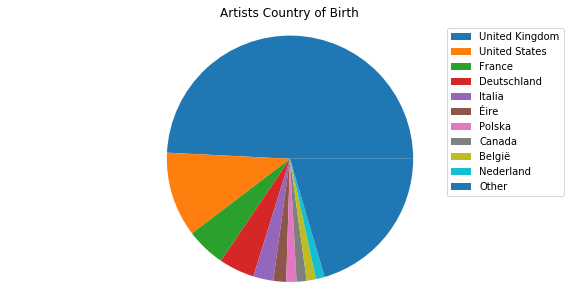

In [61]:
# Process data to create counts by country

# Split the place of birth on commas
locations = artists.placeOfBirth.str.split(',', 1).tolist()

locations = [x for x in locations if str(x) != 'nan']
countries = []

# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    countries.append(c)
countries = pd.DataFrame(countries, columns=['country'])

# Create numeric counts
cntry_counts = pd.DataFrame(countries.country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
# T Notes: This is a way to add new rows to an existing series
cntry_counts.loc['tinsae'] = other

# T Notes: index is the column name, 'tinsae' is the cell inside the given column, it renames it to 'Other'
cntry_counts = cntry_counts.rename(index={'tinsae': 'Other'})
print(cntry_counts)
# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.country)
plt.axis('equal')
plt.title('Artists Country of Birth')
plt.legend(cntry_counts.index)

So, about half of the artists in the collection are from the UK, which again is not hugely surprising as this is a British collection. The two things of note we see here are that the US and Canada are the only two non-European countries in the top 10. Also, the other countries selection is quite large, with a very large number of countries having some representation in the tate collection and making up almost a quarter of their collection.

Text(0.5,1,'Artists Born by Year')

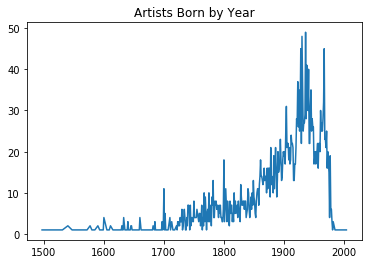

In [62]:
plt.plot(artists.yearOfBirth.value_counts().sort_index())
plt.title('Artists Born by Year')

You can see that the closer to modern times we get, the more artists we have represented. You see some interesting peaks around the centuries that are perhaps worthy of further investigation. Maybe they're using something other than artist's names to talk about movements?

How does this compare to when artworks were acquired?

Text(0,0.5,'Works Acquired')

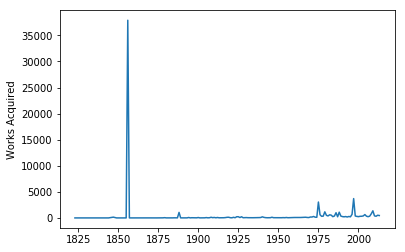

In [63]:
acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

This shows a collection that seems to have several peaks in its growth. That is consistent with how museum collections tend to grow. While there is some steady acquisition, which is somewhat visible in the more modern years (though this is not a great visual of that), museums tend to see the majority of their growth from large gifts or bequests. The Turner Bequest, again, is the most visible. What does it look like without Turner?

Text(0,0.5,'Works Acquired')

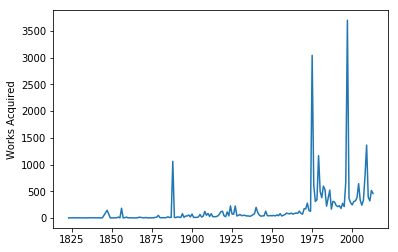

In [64]:
acquisition_df = pd.DataFrame(works[works.artist != 'Turner, Joseph Mallord William'].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')

This shows a few more clear spikes but also a clear narrative that the collection has been growing more rapidly in recent years. This aligns with the skew towards contemporary artists.

Let's move on to one last subject: determining the portion of the artists who are living. For this, we'll use year of death as an indicator. 

Text(0.5,1,'Artists Who are No Longer Living')

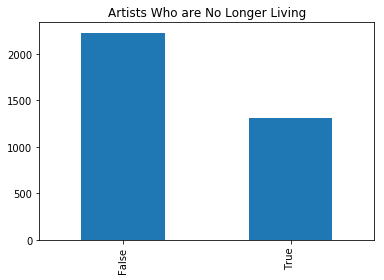

In [65]:
#T Notes: creates a boolean series, true and false
living = pd.DataFrame(artists.yearOfDeath.isnull())
living = pd.DataFrame(living.yearOfDeath.value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

This shows a surprisingly large portion of the artists collected by the Tate are still living. However, when put into context that the Tate is one of the largest supporters of contemporary art in Britain, hosting the largest prize for contemporary art with the Turner Prize, it does fit their profile.

__#3 What are the most popular mediums and how does medium affect size?__

So it would be tempting to start with medium just as the data provides it. However, this reveals a bit of a problem.

In [66]:
works.medium.value_counts().head(10)

Graphite on paper                            26167
Oil paint on canvas                           3383
Screenprint on paper                          2984
Lithograph on paper                           2721
Watercolour on paper                          1890
Etching on paper                              1793
Graphite and watercolour on paper             1680
Ink on paper                                   880
Intaglio print on paper                        820
Photograph, gelatin silver print on paper      750
Name: medium, dtype: int64

There are way too many kinds of medium, and with a level of subtlety that we don't really want. We'll group some together.

We're also dropping Turner here because he has 25,000 works on paper that skew all counts towards that.

In [67]:
works

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922.0,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785,1922.0,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922.0,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
5,1040,A00006,"Blake, William",artist,39,Ciampolo the Barrator Tormented by the Devils,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 240 x 338 mm,240,338,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-ciam...
6,1041,A00007,"Blake, William",artist,39,The Baffled Devils Fighting,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 242 x 334 mm,242,334,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
7,1042,A00008,"Blake, William",artist,39,The Six-Footed Serpent Attacking Agnolo Brunel...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 246 x 340 mm,246,340,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
8,1043,A00009,"Blake, William",artist,39,The Serpent Attacking Buoso Donati,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 241 x 335 mm,241,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
9,1044,A00010,"Blake, William",artist,39,The Pit of Disease: The Falsifiers,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826,1919.0,image: 243 x 340 mm,243,340,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


In [68]:
# Remove Turner
turnerless_artworks = works[works['artist'] != 'Turner, Joseph Mallord William']
# Coerce to Numeric
turnerless_artworks.height = pd.to_numeric(turnerless_artworks.height, errors = 'coerce')
#T Notes: Here I found that by using coerce we can ignore any convertion problems and set the result to Nan
        #Actually there are a lot of empty values that are inconvertible, there is one row which contains illegal 
        # string - "mm", it must be a typo
        # There were 69201 values originally, and after removing turner and empty heights = 27293

turnerless_artworks.width = pd.to_numeric(turnerless_artworks.width, errors = 'coerce')
turnerless_artworks.depth = pd.to_numeric(turnerless_artworks.depth, errors = 'coerce')
turnerless_artworks = turnerless_artworks[turnerless_artworks['units']=='mm']
turnerless_artworks = turnerless_artworks[turnerless_artworks.height.notnull()]

## The error is just because of how we did the conditional select and we don't need to be worried about it...

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [116]:
# Aggregate to new medium_agg column
turnerless_artworks['medium_agg'] = 'other'
#print(turnerless_artworks)
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
turnerless_artworks.loc[turnerless_artworks['medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

# T Tries
# The two numbers are confirmed to be correct by Excel
print("length of the data: " , len(turnerless_artworks))
print("mediumless rows:", len(turnerless_artworks[turnerless_artworks['medium'].isnull()]))


#turnerless_artworks['medium_agg'].value_counts().plot(kind = "pie")

length of the data:  27293
mediumless rows: 10


In [119]:
# T Note: This a way to filter a bunch of columns
print(turnerless_artworks[['medium_agg','height','width','depth','surface']])
turnerless_artworks[['medium_agg','height','width','depth','surface']].groupby('medium_agg').describe()

                medium_agg  height   width   depth     surface
0                    paper   419.0   394.0     NaN    165086.0
1                    paper   213.0   311.0     NaN     66243.0
2                    paper   467.0   343.0     NaN    160181.0
3                    paper   394.0   318.0     NaN    125292.0
4                    paper   335.0   243.0     NaN     81405.0
5                    paper   338.0   240.0     NaN     81120.0
6                    paper   334.0   242.0     NaN     80828.0
7                    paper   340.0   246.0     NaN     83640.0
8                    paper   335.0   241.0     NaN     80735.0
9                    paper   340.0   243.0     NaN     82620.0
10                   paper   340.0   236.0     NaN     80240.0
11                   paper   150.0   184.0     NaN     27600.0
12                   paper   151.0   197.0     NaN     29747.0
13                   paper   153.0   197.0     NaN     30141.0
14                   paper   152.0   200.0     NaN     

depth                                                 \
                     count         mean          std   min     25%    50%   
medium_agg                                                                  
canvas                83.0   134.957831   355.563519   5.5   27.50   35.0   
other                953.0   761.288772  1448.336740   3.0  125.00  300.0   
other painted panel  442.0    76.997738   290.694723   2.0   20.00   30.0   
paper                160.0   277.478125   695.113346   1.0   28.25   45.0   
photo                 32.0   215.968750   467.421236  18.0   25.00   39.5   
plate                  8.0  1997.625000  4215.212448  25.0   75.00  585.5   
sculpture            620.0   406.875806   504.036311   8.0  152.00  270.0   
wood                 208.0   548.336538   923.748764   6.0   91.50  260.0   

                                        height                ...     \
                         75%      max    count         mean   ...      
medium_agg                                                    ...      
canvas                 53.00   2185.0    260.0  1776.396154   ...      
other                 750.00  18290.0   1301.0  1189.179554   ...      
other painted panel    55.00   5486.0   4408.0  1032.772913   ...      
paper                 184.00   5000.0  19800.0   417.212288   ...      
photo                 146.50   2015.0    192.0  1286.786458   ...      
plate                1107.75  12360.0    344.0   347.148256   ...      
sculpture             445.00   5800.0    639.0   619.608764   ...      
wood                  510.00   6300.0    349.0  1067.189112   ...      

                       surface                 width               \
                           75%          max    count         mean   
medium_agg                                                          
canvas               4707935.5   21731950.0    259.0  1495.119691   
other                1597850.0   91253940.0   1298.0   960.942604   
other painted panel  1558060.5   36233100.0   4408.0   960.962568   
paper                 315810.0   32376000.0  19780.0   407.575925   
photo                1696120.0   54315000.0    190.0   973.368421   
plate                  69845.0    6549000.0    344.0   264.523256   
sculpture             662296.5   17964018.0    639.0   765.388106   
wood                 1247400.0  132462000.0    349.0  1065.908309   

                                                                          
                             std    min    25%     50%      75%      max  
medium_agg                                                                
canvas                890.336830  120.0  727.5  1410.0  2135.00   4860.0  
other                1019.110727    5.0  290.0   603.0  1314.75  10900.0  
other painted panel   639.367519   50.0  508.0   762.0  1244.25   4580.0  
paper                 326.287752    3.0  190.0   320.0   543.25   8454.0  
photo                 962.547810  100.0  380.0   608.0  1202.75   4892.0  
plate                 210.308546  102.0  229.0   229.0   229.00   2235.0  
sculpture             657.149556   19.0  304.0   533.0  1029.00   3750.0  
wood                 1145.166249   35.0  400.0   756.0  1310.00  11960.0  

[8 rows x 32 columns]

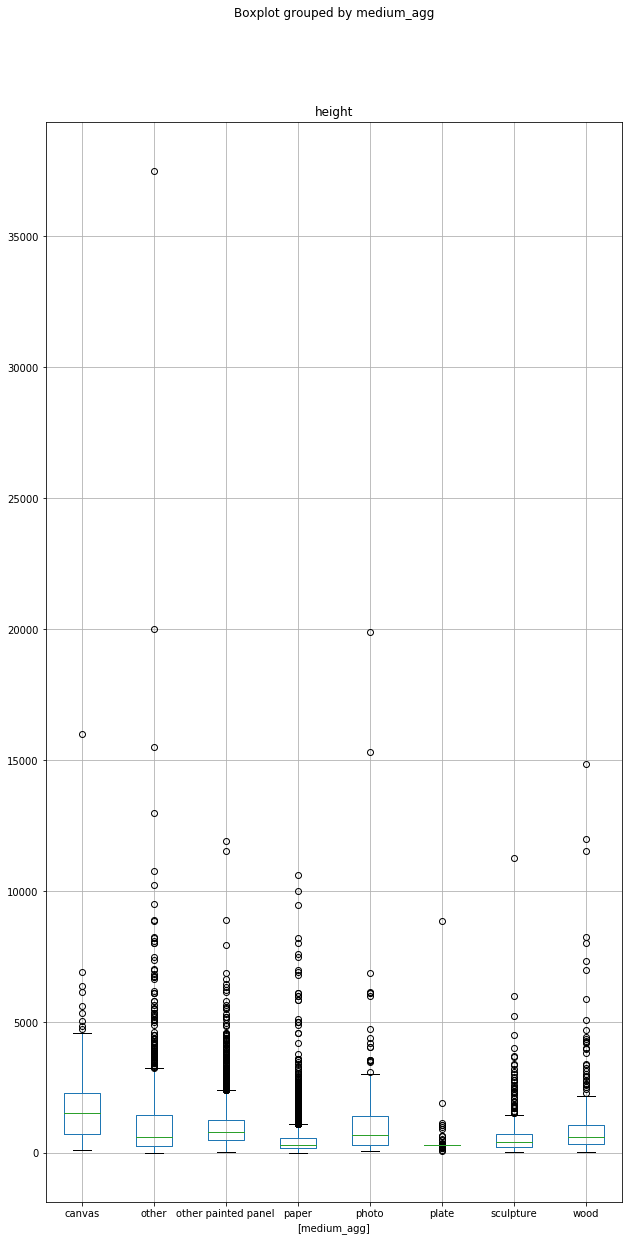

In [122]:
# T notes: See only the two columns, it didn't use the above grouped data as I was hoping
turnerless_artworks[['medium_agg', 'height']]
# T notes: nice box plot, it will plot a line for every type of medium in this table
turnerless_artworks[['medium_agg', 'height']].boxplot(by='medium_agg', figsize=(10,20))

Now, that plot is so ghastly large that it's likely impossible to see all of it on a monitor at once. However, keeping it makes a point. There are some _exceptional_ outliers here. The most striking is a steel piece by Miroslaw Balka measuring 37.5 meters high! We only included one of the plots, but it would be trivial to generate the same boxplot for width, depth, and surface area. Admittedly there are also some works on paper over 10 meters high.

However, the bottom part of the plot has more generally applicable conclusions to show. Plates are almost all the same size (this is things like copper plates by the way, not ceramic). Canvas is the largest in medium and 75th percentile, and therefore also the highest whisker.

So as one would expect different mediums are generally different sizes but there is huge variation in the collection, so trying to predict medium off of size could be very difficult.

Also just for fun, they have 27 works in the medium of "ink on banknote", so that's something. It's a series by Cildo Meireles.